In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings

warnings.filterwarnings('ignore')

# Loading dataset
df = pd.read_csv('Data/properties_2016.csv')
df.head()
train = pd.read_csv('Data/train_2016_v2.csv')

In [33]:
to_remove = [] 
for col in df.columns: 
  
    # Removing columns having only one value. 
    if df[col].nunique() == 1: 
        to_remove.append(col) 
  
    # Removing columns with more than 90% of the 
    # rows as null values. 
    elif (df[col].isnull()).mean() > 0.60: 
        to_remove.append(col) 
  
print(len(to_remove)) 

29


In [34]:
df.drop(to_remove, 
        axis=1, 
        inplace=True) 

In [35]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        df[col] = df[col].fillna(df[col].mode()[0]) 
    elif df[col].dtype == np.number: 
        df[col] = df[col].fillna(df[col].mean()) 
  
df.isnull().sum().sum() 

0

In [36]:
ints, objects, floats = [], [], [] 
  
for col in df.columns: 
    if df[col].dtype == float: 
        floats.append(col) 
    elif df[col].dtype == int: 
        ints.append(col) 
    else: 
        objects.append(col) 
  
len(ints), len(floats), len(objects)

(0, 26, 3)

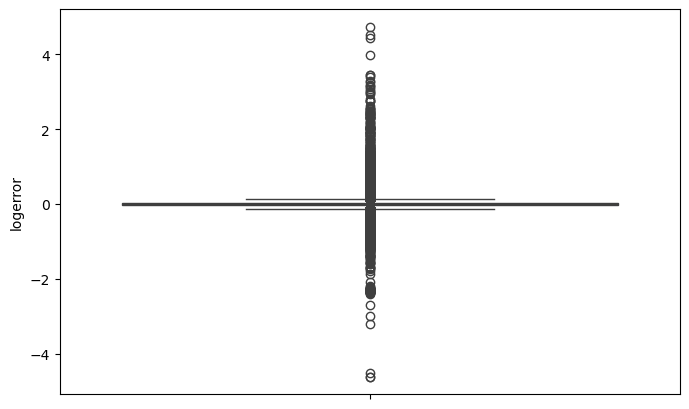

In [37]:
plt.figure(figsize=(8, 5)) 
sb.boxplot(train['logerror']) 
plt.show() 

In [38]:
print('Shape of the dataframe before removal of outliers', df.shape) 
train = train[(train['logerror'] > -1) & (train['logerror'] < 1)]

df = df.merge(train[['parcelid','logerror']], on='parcelid', how='inner')
print('Shape of the dataframe after removal of outliers ', df.shape)

Shape of the dataframe before removal of outliers (2985217, 29)
Shape of the dataframe after removal of outliers  (89933, 30)


In [39]:
for col in objects: 
    le = LabelEncoder() 
    df[col] = le.fit_transform(df[col]) 

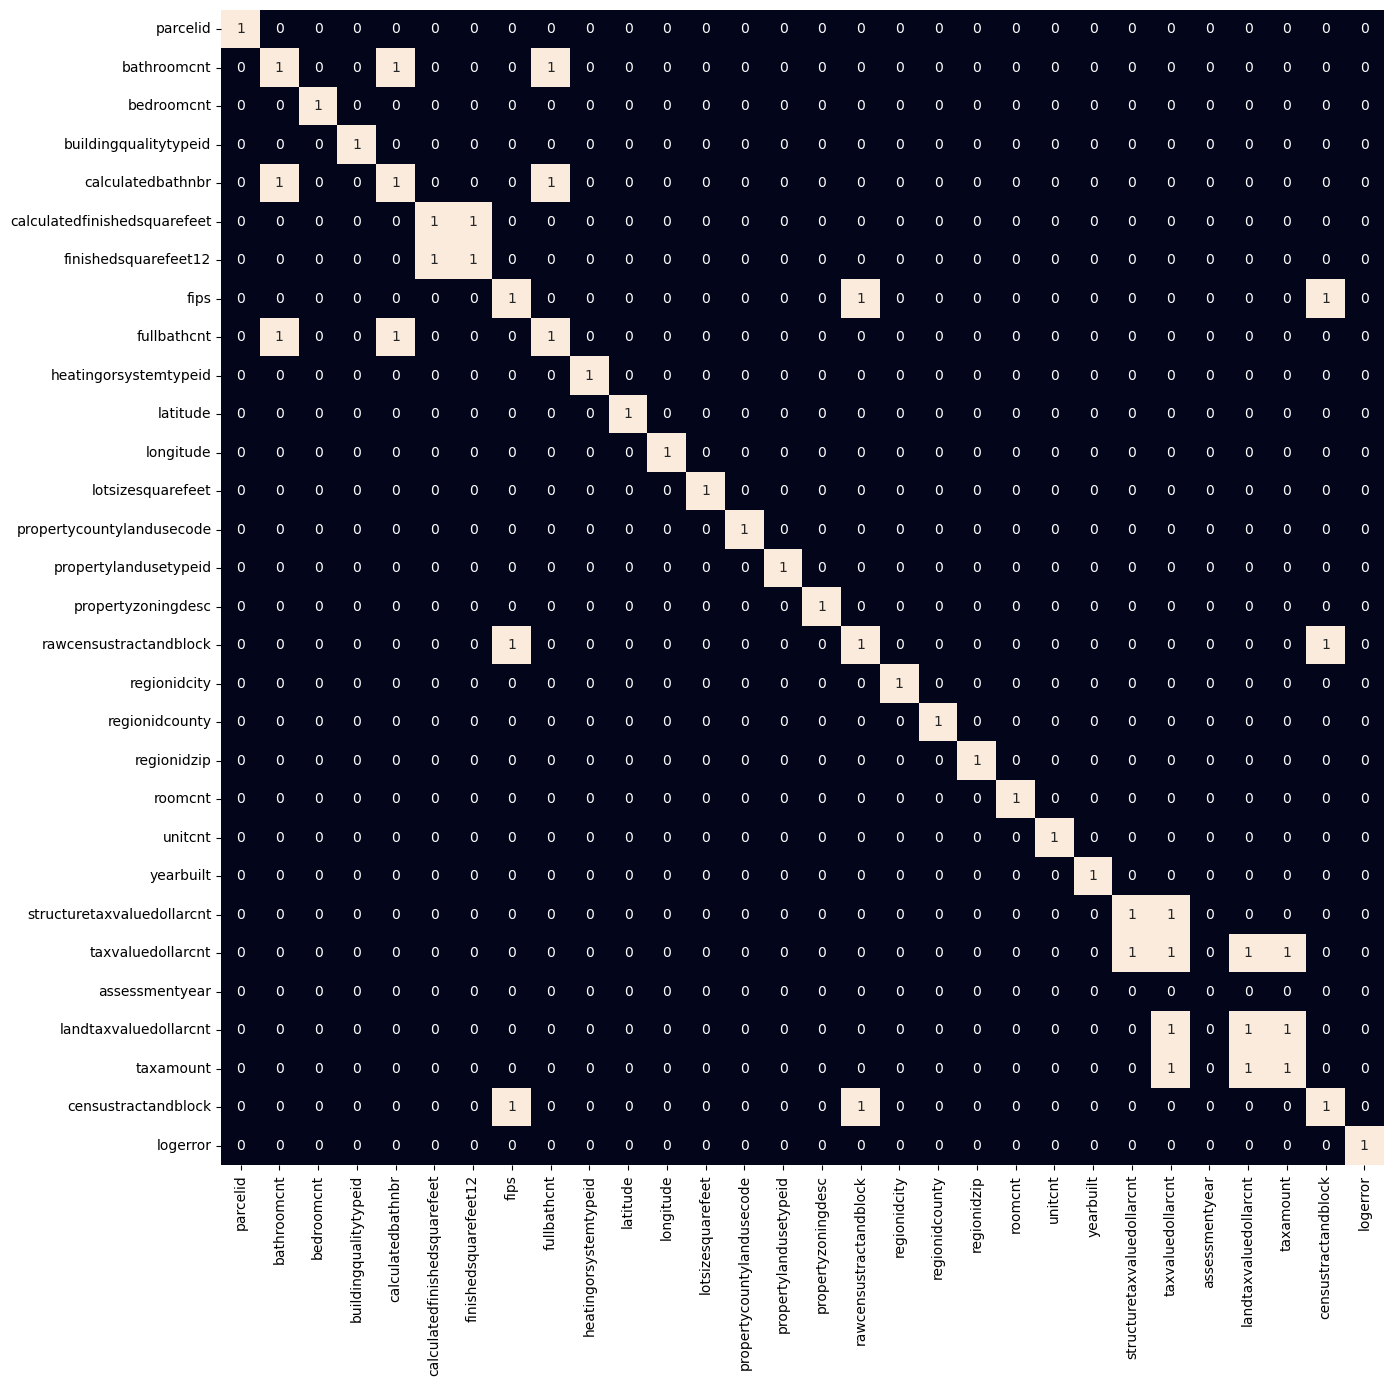

In [40]:
plt.figure(figsize=(15, 15)) 
sb.heatmap(df.corr() > 0.8, 
           annot=True, 
           cbar=False) 
plt.show() 

In [41]:
to_remove = ['calculatedbathnbr', 'fullbathcnt', 'fips', 
             'rawcensustractandblock', 'taxvaluedollarcnt', 
             'finishedsquarefeet12', 'landtaxvaluedollarcnt'] 
  
df.drop(to_remove, axis=1, inplace=True)

In [42]:
features = df.drop(['parcelid'], axis=1)
target = df['logerror'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)

In [44]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 

In [45]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), XGBRegressor(), 
          Lasso(), RandomForestRegressor(), Ridge()] 
  
for i in range(5): 
    models[i].fit(X_train, Y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 
  
    val_preds = models[i].predict(X_val) 
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print() 

LinearRegression() : 
Training Error :  5.1264337523655925e-17
Validation Error :  5.213630977907813e-17

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.0011296185851783227
Validation Error :  0.002217671494839707

Lasso() : 
Training Error :  0.061962930175175714
Validation E